## Assignment no 43 Feature Extraction and Scaling (19.3.23)

Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.

Ans - 
Rescaling (min-max normalization)
- It is a method of Feature scaling which is used to normalize the range of independent variables or features of data. 
- Also known as min-max scaling or min-max normalization, rescaling is the simplest method and consists in rescaling the range of features to scale the range in [0, 1] or [−1, 1]. 
- Selecting the target range depends on the nature of the data. The general formula for a min-max of [0, 1] is given as:

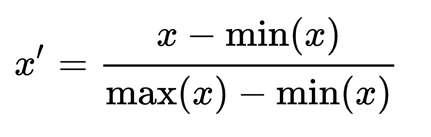

Here, Xmax and Xmin are the maximum and the minimum values of the feature, respectively.

1. When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0
2. On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator, and thus the value of X’ is 1
3. If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and 1

In [2]:
import seaborn as sns
import pandas as pd

In [2]:
df_planets = sns.load_dataset('planets')

In [3]:
df_planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [4]:
# Importing MinMaxScaler form sklearn

from sklearn.preprocessing import MinMaxScaler

In [5]:
# creating instance to MInMaxScaler

min_max = MinMaxScaler()

In [6]:
normalized_data = min_max.fit_transform(df_planets[['orbital_period','mass','distance']])

In [7]:
normalized_data[0:5]

array([[3.68779900e-04, 2.83896881e-01, 8.94848005e-03],
       [1.19819644e-03, 8.82687107e-02, 6.54221553e-03],
       [1.04508135e-03, 1.03870957e-01, 2.17563966e-03],
       [4.46492239e-04, 7.75967739e-01, 1.28573362e-02],
       [7.07026518e-04, 4.19916468e-01, 1.38986780e-02]])

In [10]:
df_planets[['normalized orbital_period','normalized mass','normalized distance']] = pd.DataFrame(normalized_data)

In [11]:
df_planets.head()

,method,number,orbital_period,mass,distance,year,normalized orbital_period,normalized mass,normalized distance
0,Radial Velocity,1,269.300,7.10,77.40,2006,0.000369,0.283897,0.008948
1,Radial Velocity,1,874.774,2.21,56.95,2008,0.001198,0.088269,0.006542
2,Radial Velocity,1,763.000,2.60,19.84,2011,0.001045,0.103871,0.002176
3,Radial Velocity,1,326.030,19.40,110.62,2007,0.000446,0.775968,0.012857
4,Radial Velocity,1,516.220,10.50,119.47,2009,0.000707,0.419916,0.013899


Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling?
Provide an example to illustrate its application.

Ans - 
- It is of the normalization techinque in Feature Scaling where scaling/normalization is done considering the whole feature vector to be of unit length. 
- This usually means dividing each component by the Euclidean length of the vector (L2 Norm). 
- In some applications (e.g., histogram features), it can be more practical to use the L1 norm of the feature vector.

- The major difference between MinMax Scaler and Unit vector is that MinMax Scaler gives values ranging from 0 to 1, while unit vector gives the value with respect to 1 i.e. Scale input vectors individually to unit norm (vector length).

In [3]:
df_taxis = sns.load_dataset('taxis')

In [4]:
df_taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [5]:
from sklearn.preprocessing import normalize

In [6]:
univec_normalized = normalize(df_taxis[['distance','fare','tip']])

In [7]:
univec_normalized

array([[0.21346145, 0.93389384, 0.28683882],
       [0.15606402, 0.98774694, 0.        ],
       [0.1716575 , 0.93973084, 0.29570197],
       ...,
       [0.25050016, 0.96811656, 0.        ],
       [0.18349711, 0.98302025, 0.        ],
       [0.2429556 , 0.94658025, 0.21203398]])

In [8]:
df_taxis[['UniVec Normalized distance','UniVec Normalized fare','UniVec Normalized tip']] = pd.DataFrame(univec_normalized)

In [10]:
df_taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,UniVec Normalized distance,UniVec Normalized fare,UniVec Normalized tip
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,0.213461,0.933894,0.286839
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,0.156064,0.987747,0.000000
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,0.171657,0.939731,0.295702
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,0.267899,0.939386,0.213971
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,0.231742,0.965592,0.118017


Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application.

Ans - 

## Principal Component Analysis
- The Principal Component Analysis also known as PCA is a popular unsupervised learning technique for reducing the dimensionality of data. 
- It increases interpretability yet, at the same time, it minimizes information loss. 
- It helps to find the most significant features in a dataset and makes the data easy for plotting in 2D and 3D. 
- PCA helps in finding a sequence of linear combinations of variables.

## PCA in Dimensionality Reduction
- The term Before hopping into Dimensionalty Reduction let us first undersatnd what is "dimensionality". 
- It describes the quantity of features or variables used in the research. It can be difficult to visualize and interpret the relationships between variables when dealing with high-dimensional data, such as datasets with numerous variables. 
- While reducing the number of variables in the dataset, dimensionality reduction methods like PCA are used to preserve the most crucial data. 
- The original variables are converted into a new set of variables called principal components, which are linear combinations of the original variables, by PCA in order to accomplish this. 
- The dataset's reduced dimensionality depends on how many principal components are used in the study. - The objective of PCA is to select fewer principal components that account for the data's most important variation. 
- PCA can help to streamline data analysis, enhance visualization, and make it simpler to spot trends and relationships between factors by reducing the dimensionality of the dataset.

In [11]:
import seaborn as sns

In [12]:
# load dataset into Pandas DataFrame
df_iris = sns.load_dataset("iris")

In [13]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [15]:
#creating variables (Independent and Dependent) for standardization w.r.t to dataset 
x = df_iris.loc[:, features].values
y = df_iris.loc[:, ["species"]].values

In [16]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [17]:
#creating a standardized dataframe
import pandas as pd

df_iris_standard = pd.DataFrame(data = x, columns = features).head()

In [18]:
df_iris_standard.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [19]:
# reducing dimensions from four to two (for better visualization) with PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])

In [21]:
principalDf.head()

,principal component 1,principal component 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [22]:
finalDf = pd.concat([principalDf, df_iris[['species']]], axis = 1)

In [23]:
finalDf.head()

,principal component 1,principal component 2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


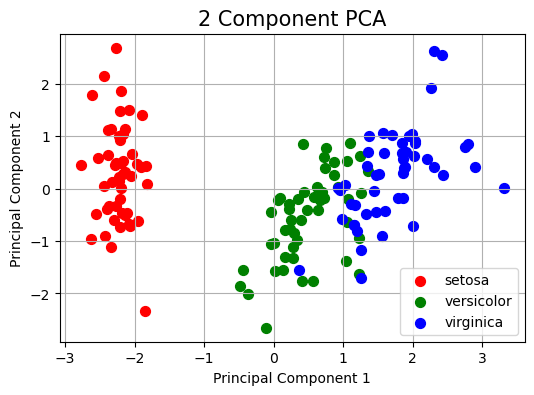

In [26]:
# visualizing newly formed PCA dataframe
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 Component PCA', fontsize = 15)


species = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for specie, color in zip(species,colors):
    indicesToKeep = finalDf['species'] == specie
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
    
ax.legend(species)
ax.grid()

The explained variance tells us how much information (variance) can be attributed to each of the principal components.


In [27]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

Together, the first two principal components contain 95.80% of the information. The first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. The third and fourth principal component contained the rest of the variance of the dataset. If the total variance of principal components is less than 85.00% there is too much data loss.

Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature
Extraction? Provide an example to illustrate this concept.

Ans - 
- Principal component analysis (PCA) is an unsupervised linear transformation technique which is primarily used for feature extraction and dimensionality reduction. 
- It aims to find the directions of maximum variance in high-dimensional data and projects the data onto a new subspace with equal or fewer dimensions than the original one.
- PCA is a dimensionality reduction that identifies important relationships in our data, transforms the existing data based on these relationships, and then quantifies the importance of these relationships so we can keep the most important relationships and drop the others. To remember this definition, we can break it down into four steps:

1. We identify the relationship among features through a Covariance Matrix.
2. Through the linear transformation or eigendecomposition of the Covariance Matrix, we get eigenvectors and eigenvalues.
3. Then we transform our data using Eigenvectors into principal components.
4. Lastly, we quantify the importance of these relationships using Eigenvalues and keep the important principal components.

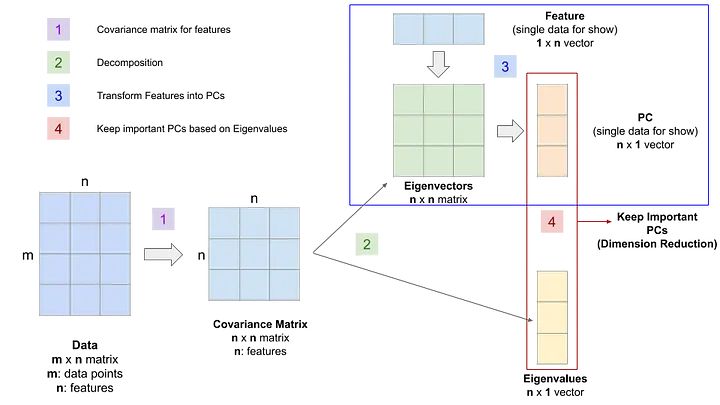

In [ ]:
Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset
contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to
preprocess the data.

Ans - 
1. At first I will get to know the datatype of each feature within dataset by df_food.info() function.
    eg. Datatypes of price, rating and delivery time may be in float, int and datatime format respectively.
2. Now most effective features for recommendation system for a food delivery service are price and rating because the 
    individual with get the most of the recommendations with respect to that so I will focus on them for Min-Max scaling.
3. Now we assume the price of food items ranges from 50.00 to 500.00 and rating from 1 to 10.
4. To start the scaling process for price and rating first i will import MinMaxScaler from sklearn as follows,
        from sklearn.preprocessing import MinMaxScaler
5. Then an instance of MinMaxScaler,
        min_max = MinMaxScaler()
6. Then fit and transform operations on considered features for recommendation system,
        normalized_features = min_max.fit_transform(df_food[['price','rating']])
7. Adding the normalized features to the dataframe,
        df_food[['normalized price','normalized rating']] = pd.DataFrame(normalized_features)

In [ ]:
Q6. You are working on a project to build a model to predict stock prices. The dataset contains many
features, such as company financial data and market trends. Explain how you would use PCA to reduce the
dimensionality of the dataset.

Ans - 
1. At very first i will get the list of columns/features which are included in stock price dataset.
2. Then i will find the features which are really affect the stock price, which means they are our Independent variables
    and can become a feature set, 
    eg. features = ['Open',	'High',	'Low',	'Close', 'Adj Close',	'Volume',	'company_name']
3. Creating variables (Independent and Dependent) for standardization w.r.t to dataset 
    eg. x = df[features].values
        y = df[["stock_price"]].values
4. Standardizing the feature set with StandardScaler()
        x = StandardScaler().fit_transform(x)
5. Reducing dimensions from len(features) to two (for better visualization) with PCA and creating a standardized dataframe
    eg.    pca = PCA(n_components=2)
           principalComponents = pca.fit_transform(x)
           principalDf = pd.DataFrame(data = principalComponents , 
                                      columns = ['principal component 1', 'principal component 2'])
6. Finally concatenationg it with target variable.
    eg. finalDf = pd.concat([principalDf, df[["stock_price"]]], axis = 1)

In [63]:
'''Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the
values to a range of -1 to 1.'''
values = [1, 5, 10, 15, 20]

minmax_value = []

for value in values:
    xbar = (value-min(values))/(max(values)-min(values))
    minmax_value.append(xbar)

In [65]:
minmax_value

[0.0, 0.21052631578947367, 0.47368421052631576, 0.7368421052631579, 1.0]

In [ ]:
Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform
Feature Extraction using PCA. How many principal components would you choose to retain, and why?

Ans - 
1. With respect to features within dataset it deals with the health domain, so i will focus the features which will be the 
    principal components as feature extraction process.
    eg. height and weight relates to BMI which plays a crucial role in individuals health also age and blood pressure.
2. Then I will find the data type of each feature which is either numerical or categorical.
3. Then perform one-hot encoding to transform categorical data set to numerical data set.
4. We identify the relationship among features through a Covariance Matrix.
5. Select the most important features using explained variance.

Conclusion - 
    I will retain height, weight, age, blood pressure as principal components with respect to PCA, bacause they play and are 
considered key factors of any persons health and not a gender(Exceptions are for some diseases which may be correlated with 
                                                             gender).